In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, accuracy_score


In [2]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)  
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
X = df[["petal length (cm)", "sepal length (cm)"]].values
# X = df[["petal length (cm)"]].values
y = df["petal width (cm)"].values

In [28]:
X.shape

(150, 2)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train), len(X_test), len(X)

(120, 30, 150)

In [30]:
X_train.shape

(120, 2)

In [31]:
y_train.shape

(120,)

In [32]:
X_train.reshape(-1, 1).shape

(240, 1)

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
results = model.predict(X_test)

In [38]:
len(results), len(X_test), len(y_test)

(30, 30, 30)

In [39]:
from sklearn.metrics import root_mean_squared_error

accuracy = root_mean_squared_error(y_test, results)
accuracy

np.float64(0.13536260911980502)

In [44]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [43]:
df["target"] = iris.target

In [56]:
X = df.drop("target", axis=1).values    
y = df["target"].values

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [58]:
tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
len(y_pred)

30

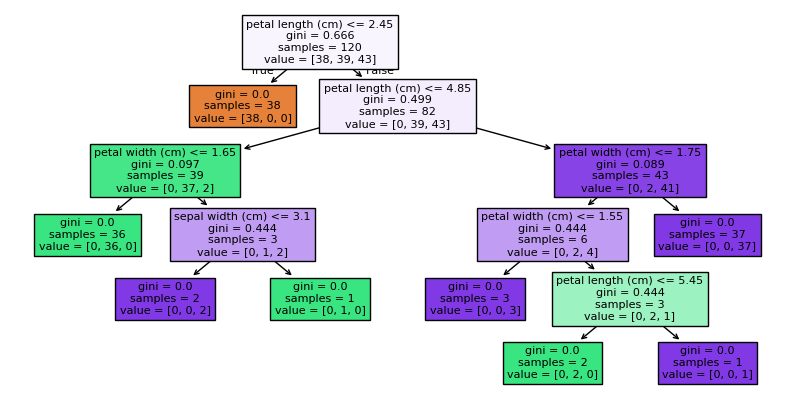

In [59]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 5))
features = iris["feature_names"] + ["target"]
plot_tree(tree, feature_names=features, filled=True)
plt.show()

In [61]:
X = df.drop("target", axis=1).values

In [62]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [65]:
X.shape

(150, 4)

In [67]:
from sklearn.decomposition import PCA

In [68]:
pca = PCA(n_components=2)

X = pca.fit_transformer(X)

AttributeError: 'PCA' object has no attribute 'fit_transformer'

Text(0.5, 1.0, 'KMeans Clustering (PCA-Reduced Data)')

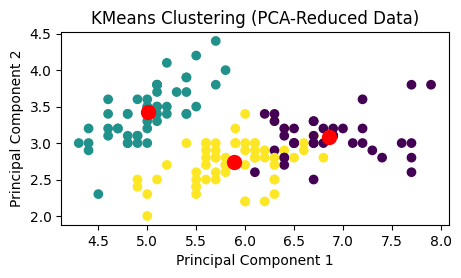

In [70]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(X)

# Plot the clusters
plt.figure(figsize=(5, 2.5))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_pca.labels_)
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], s=100, c='red')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KMeans Clustering (PCA-Reduced Data)")